In [29]:
#Fashion datatset

In [30]:
import torch
from torch import optim
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))
                               ])
#Download the training data and load it
# Use standard FashionMNIST dataset
testset = datasets.FashionMNIST('MNIST_data/', download=True, train=False, transform=transform)  
trainset = datasets.FashionMNIST('MNIST_data/', download=True, train=True, transform=transform)  
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [31]:
# Building the network 
model = nn.Sequential(nn.Linear(784,256),
                      nn.ReLU(),
                      nn.Linear(256,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))
#define the loss
criterion = nn.NLLLoss()
optimization = optim.Adam(model.parameters(), lr=0.003)

In [32]:
# Training my network
epoches = 30
steps = 0
train_losses, test_losses = [],[]
for e in range(epoches):
    runing_loss = 0
    for images, labels in trainloader: 
        # Todo training pass
        optimization.zero_grad()
        
         #flatten images
        images = images.view(images.shape[0], -1)
        log_ps = model(images)
        #output = model.forward(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        
        optimization.step()
        
        runing_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            for images, labels in testloader:
                images = images.view(images.shape[0], -1)
                log_ps = model(images)
                #log_ps = model.forward(images)
                test_loss += criterion(log_ps, labels)
                ps = torch.exp(log_ps)
                
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        train_losses.append(runing_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        #print("training loss: ", runing_loss / len(trainloader))
        print("Epoche: {}/{}".format(e+1, epoches),
              "Train loss {:.3f}.. ".format(runing_loss/len(trainloader)),
              "Test loss {:.3f}.. ".format(test_loss/len(testloader)),
              "Accuracy {:.3f}.. ".format(accuracy/len(testloader)))
                  
            

Epoche: 1/30 Train loss 0.519..  Test loss 0.400..  Accuracy 0.852.. 
Epoche: 2/30 Train loss 0.394..  Test loss 0.359..  Accuracy 0.870.. 
Epoche: 3/30 Train loss 0.358..  Test loss 0.331..  Accuracy 0.878.. 
Epoche: 4/30 Train loss 0.335..  Test loss 0.312..  Accuracy 0.886.. 
Epoche: 5/30 Train loss 0.318..  Test loss 0.313..  Accuracy 0.887.. 
Epoche: 6/30 Train loss 0.307..  Test loss 0.292..  Accuracy 0.893.. 
Epoche: 7/30 Train loss 0.291..  Test loss 0.276..  Accuracy 0.898.. 
Epoche: 8/30 Train loss 0.289..  Test loss 0.266..  Accuracy 0.905.. 
Epoche: 9/30 Train loss 0.276..  Test loss 0.263..  Accuracy 0.900.. 
Epoche: 10/30 Train loss 0.270..  Test loss 0.260..  Accuracy 0.903.. 
Epoche: 11/30 Train loss 0.264..  Test loss 0.256..  Accuracy 0.907.. 
Epoche: 12/30 Train loss 0.254..  Test loss 0.230..  Accuracy 0.914.. 
Epoche: 13/30 Train loss 0.249..  Test loss 0.238..  Accuracy 0.911.. 
Epoche: 14/30 Train loss 0.242..  Test loss 0.228..  Accuracy 0.916.. 
Epoche: 15/30 T

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

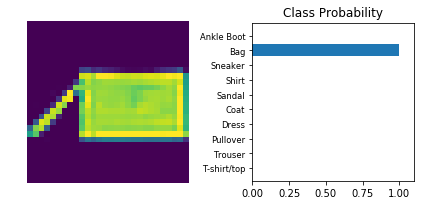

In [34]:
# Get our data
images, labels = next(iter(trainloader))
#flatten images 1 , 784
img = images.view(images.shape[0], -1)

image = images[0].view(1, 784)

with torch.no_grad():
    logits = model.forward(image)
ps = F.softmax(logits, dim=1)
view_classify(image,ps,version="Fashion")